In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('Housing.csv')
X=df.drop('price',axis=1)
y=df['price']

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['mainroad']=le.fit_transform(X['mainroad'])
X['guestroom']=le.fit_transform(X['guestroom'])
X['basement']=le.fit_transform(X['basement'])
X['hotwaterheating']=le.fit_transform(X['hotwaterheating'])
X['airconditioning']=le.fit_transform(X['airconditioning'])
X['prefarea']=le.fit_transform(X['prefarea'])
X['furnishingstatus']=le.fit_transform(X['furnishingstatus'])

print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y_train)

LinearRegression()

In [16]:
y_pred=lin_reg.predict(poly_reg.transform(X_test))
y_pred

array([ 4341976.98448469,  7703961.15315539,  3523318.97933257,
        4314868.86936494,  3795687.46634832,  3547329.38213477,
        5482861.38664583,  5358658.20979459,  3429845.62041572,
        3090802.05365639, 12429809.73142543,  2980487.95278157,
        2633886.07409686,  3418417.3764478 ,  3764889.30610695,
        4539159.02093282,  3330535.23066641,  4320924.29451891,
        4539954.86940923,  4011244.6015935 ,  6165017.58581025,
        5687997.83020627,  2903975.2238095 ,  5277534.88373085,
        4423838.75284073,  7952677.75393163,  3965577.94586603,
        3679685.42779631,  8162704.6284989 ,  3435498.78286153,
        6242120.01947446,  3447847.44514906,  5904611.39011375,
        4357691.99459747,  3226570.58899573,  6244193.02523929,
        5623712.92682827,  3004544.6307521 ,  2471155.64157679,
        4137741.2869323 ,  4387611.9795983 ,  2731776.08948234,
        7672870.92380167,  4217994.45903568,  4169960.79670474,
        3699317.15440036,  7236517.63592

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.649888307588992

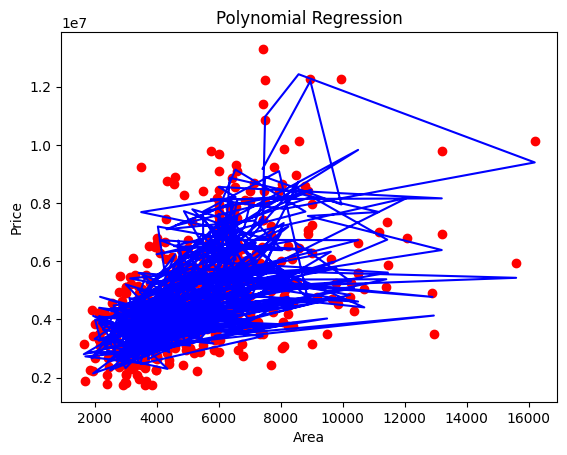

In [23]:
plt.scatter(X['area'],y,color='red')
plt.plot(X['area'],lin_reg.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()